# Machine Learning 2024/2025 - Progress Task 2 (Data Preprocessing)

## Introduction

**Statement for the task:**

In this competition-style task, your objective is to build a predictive model that estimates the likelihood of individuals receiving two different vaccines: the H1N1 flu vaccine and the seasonal flu vaccine. You will create two separate probability predictions for each individual in the dataset: 
- h1n1_vaccine: The probability that an individual receives the H1N1 flu vaccine. 
- seasonal_vaccine: The probability that an individual receives the seasonal flu vaccine. 

All the information about the task is on the following site: 
https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

## Preparation of Environmental Variables

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
PATH_DATA = 'data/'
train_features = pd.read_csv(PATH_DATA + 'training_set_features.csv')
train_labels = pd.read_csv(PATH_DATA + 'training_set_labels.csv')
test_features = pd.read_csv(PATH_DATA + 'test_set_features.csv')

## Exploratory Data Analysis (EDA)

Let's focus first on training data.

## Dataset description

In [4]:
# Check dataset columns, and dytpes for features
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Taking a look at this summary of the dataset info, we can see that there are different values for Non-Null count for each column. This means that there are missing values in the dataset. We will have to deal with them later.

In [5]:
# Check the first 3 rows of the dataset
train_features.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [6]:
# Check labels dataset
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [7]:
train_labels.head(3)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0


Label description from the competition site:

- h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
- seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

We can see that both datasets share one column, which is `respondent_id`. This column is the unique identifier for each respondent is use to relate the two datasets. We will set this column as the index for both datasets.

In [8]:
# Set the ID as index
train_features.set_index('respondent_id', inplace=True)
train_labels.set_index('respondent_id', inplace=True)

In [9]:
print("=================== SHAPE =====================")
print("Features (people, features): ",train_features.shape)
print("Labels   (people, labels):   ",train_labels.shape)

=================== SHAPE =====================
Features (people, features):  (26707, 35)
Labels   (people, labels):    (26707, 2)


Also, we will merge both datasets into one, so we can have all the information in one place and not having to deal with several variables.

In [10]:
df_patients = pd.concat([train_features, train_labels], axis=1)
# Check that the columns are concatenated
df_patients.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

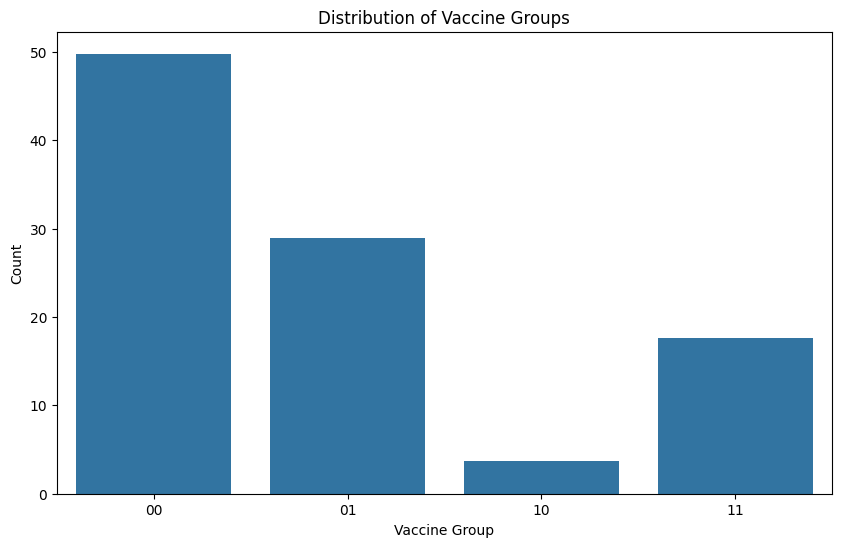

In [11]:
# Plot the distribution of h1n1_vaccine and seasonal_vaccine
# Group the labels into 00, 01, 10, 11
df_patients['vaccine_group'] = df_patients['h1n1_vaccine'].astype(str) + df_patients['seasonal_vaccine'].astype(str)

# Plot the distribution of the vaccine groups
plt.figure(figsize=(10, 6))
sns.countplot(x='vaccine_group', data=df_patients, order=['00', '01', '10', '11'], stat='percent')
plt.xlabel('Vaccine Group')
plt.ylabel('Count')
plt.title('Distribution of Vaccine Groups')
plt.show()

------------


## Null values

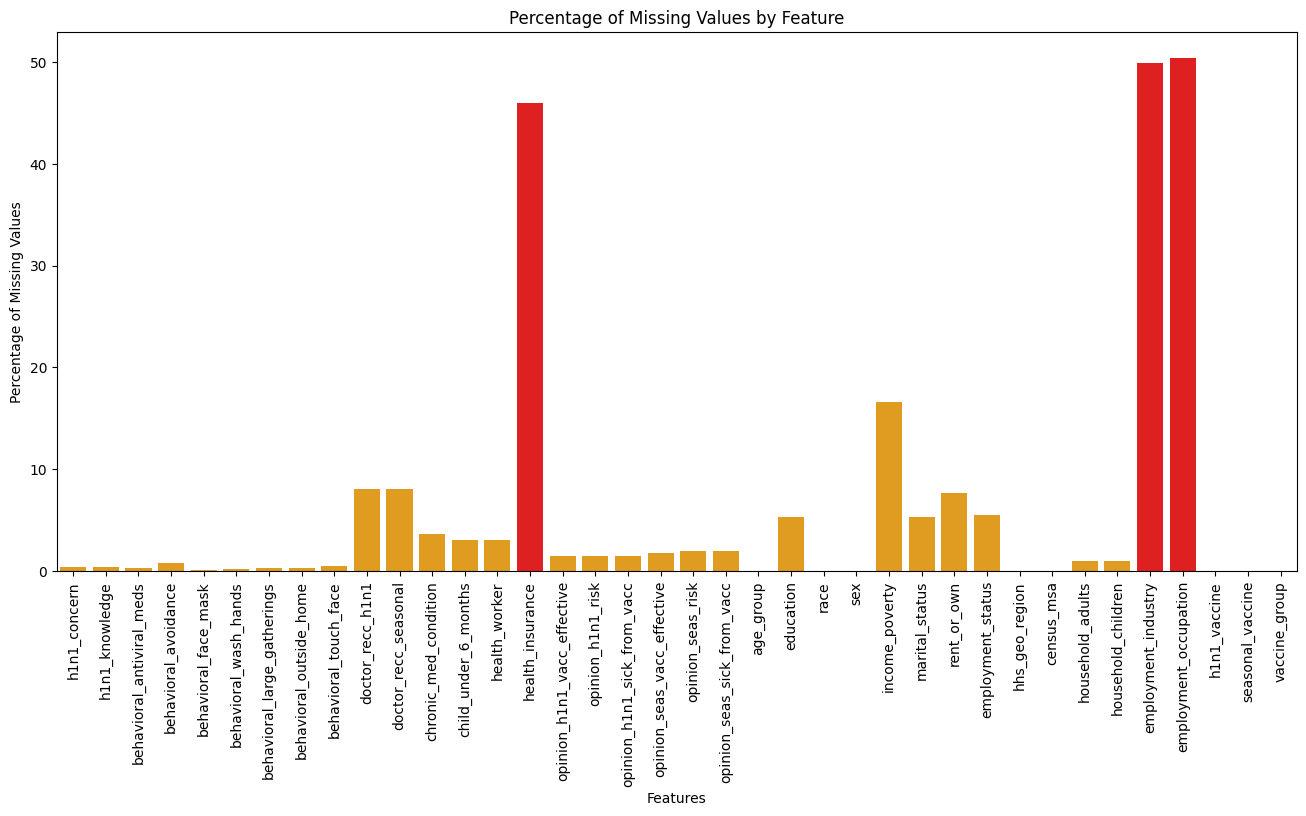

In [12]:
null = df_patients.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (null / len(df_patients)) * 100

# Plot the missing values
plt.figure(figsize=(16, 7))
colors = ['red' if val > 20 else 'orange' for val in missing_percentage.values]
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=colors, hue=missing_percentage.index, legend=False)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.title('Percentage of Missing Values by Feature')
plt.show()

Now, we are going to explore the top 3 columns with the most missing values:
* employment_industry
* employment_occupation
* health_insurance

In [13]:
df_patients['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [14]:
df_patients['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

In [15]:
# drop columns with no information
df_patients.drop(columns = ['employment_industry', 'employment_occupation'], inplace=True)

In [16]:
print("original values: ", df_patients['health_insurance'].unique()) # 0 = no, 1 = yes, na = unknown--> change to 2
df_patients['health_insurance'] = df_patients['health_insurance'].fillna(2)
print("new values: ", df_patients['health_insurance'].unique()) 

original values:  [ 1. nan  0.]
new values:  [1. 2. 0.]


In [17]:
df_patients.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine', 'vaccine_group'],
      dtype='object')

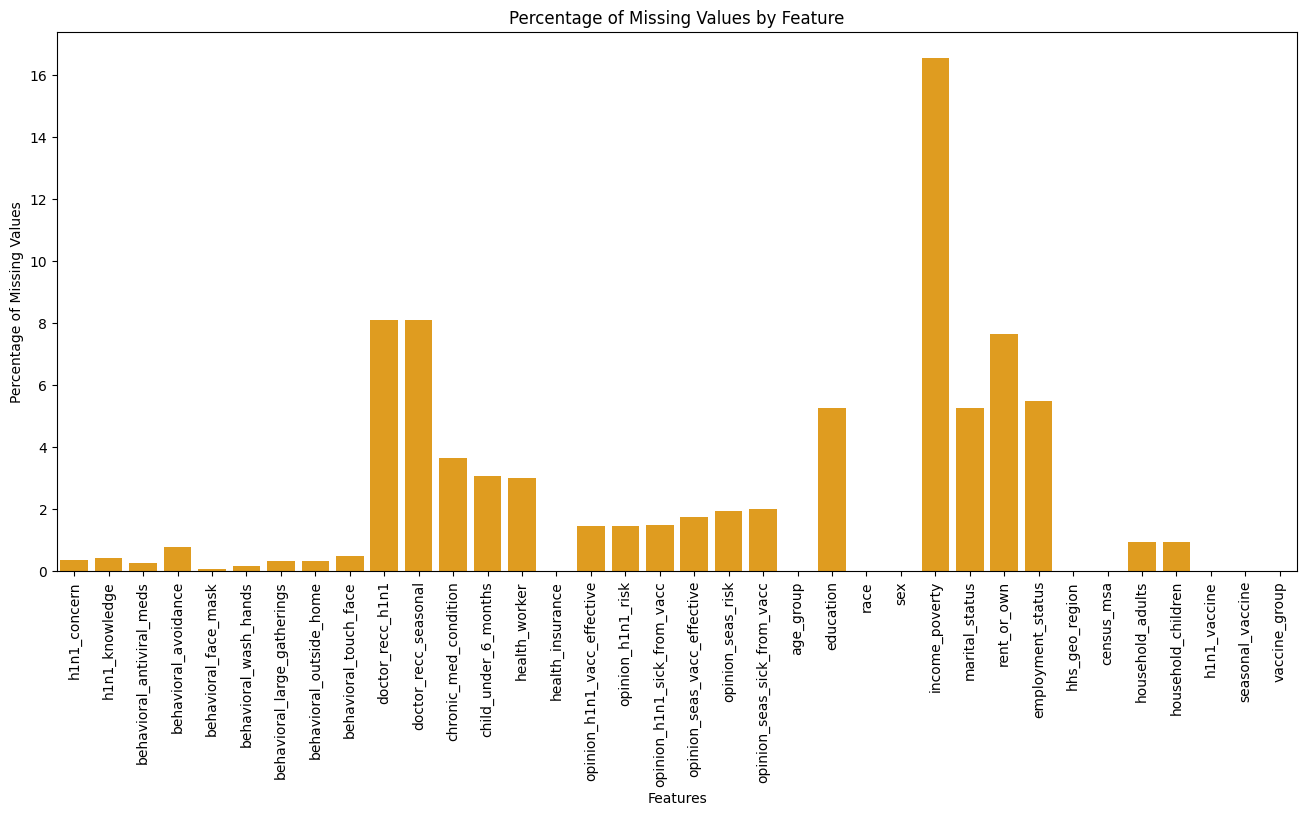

In [18]:
null = df_patients.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (null / len(df_patients)) * 100

# Plot the missing values
plt.figure(figsize=(16, 7))
colors = ['red' if val > 20 else 'orange' for val in missing_percentage.values]
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=colors, hue=missing_percentage.index, legend=False)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.title('Percentage of Missing Values by Feature')
plt.show()

In [19]:
df_patients['income_poverty'].unique() #?? al medio o a donde?

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [20]:
df_patients.dropna(subset=['income_poverty'], inplace=True)

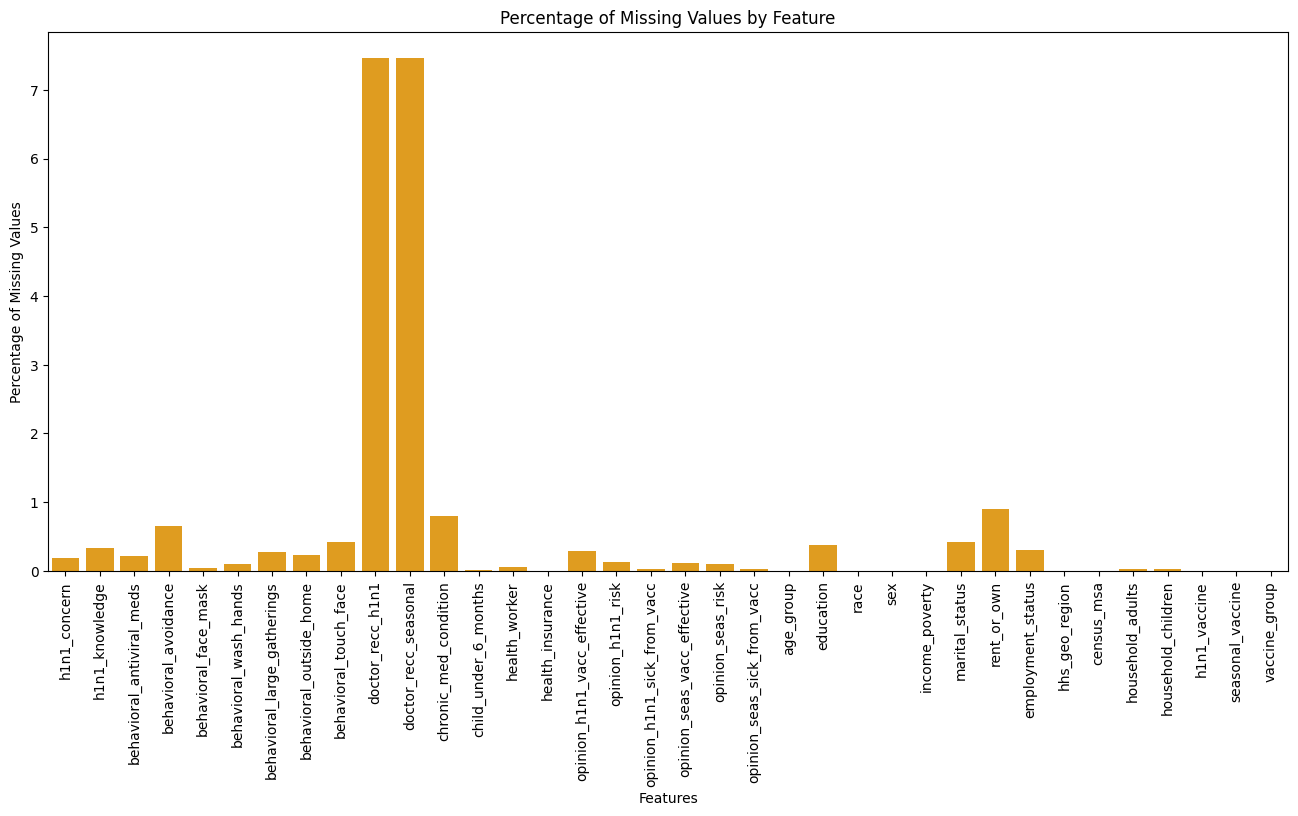

In [21]:
null = df_patients.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (null / len(df_patients)) * 100

# Plot the missing values
plt.figure(figsize=(16, 7))
colors = ['red' if val > 20 else 'orange' for val in missing_percentage.values]
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette=colors, hue=missing_percentage.index, legend=False)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Features')
plt.title('Percentage of Missing Values by Feature')
plt.show()

In [22]:
df_patients.dropna(inplace=True)

In [23]:
df_patients.shape

(19642, 36)

## Correlation

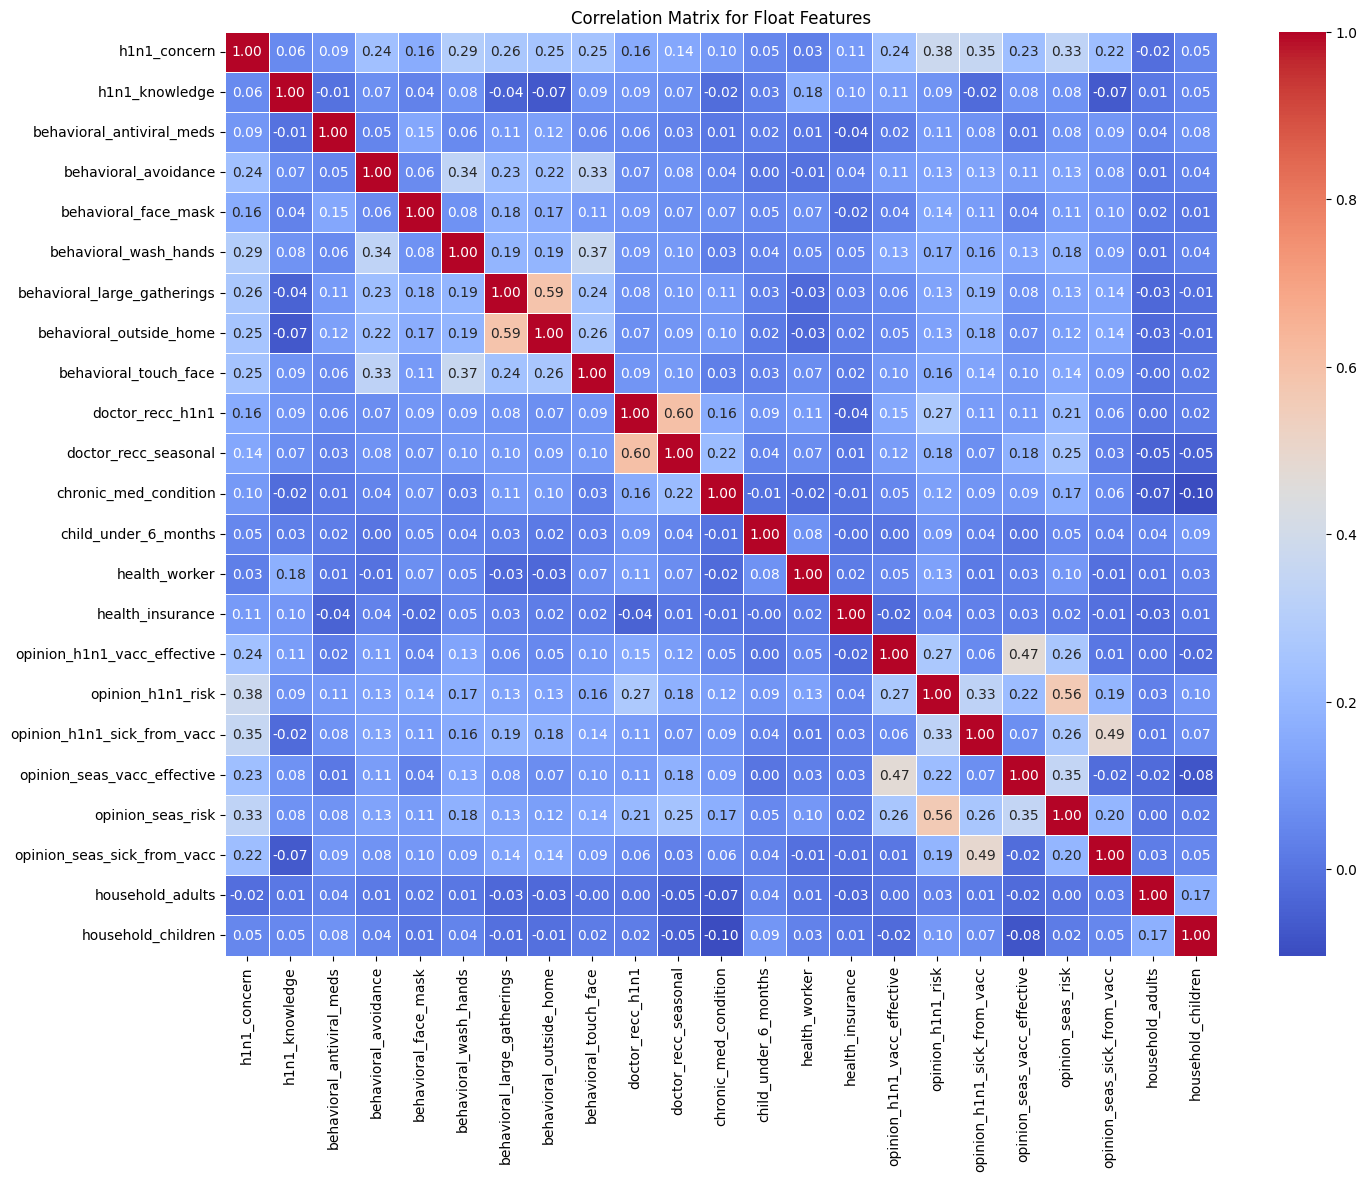

In [25]:
# Filter the dataframe to include only float features
float_features = df_patients.select_dtypes(include=['float64'])

# Calculate the correlation matrix
correlation_matrix = float_features.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Float Features')
plt.show()